In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_blobs

# for warning related stuff
import warnings
warnings.filterwarnings("ignore")

In [11]:
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, random_state=23)
# we need to ignore the y value 

In [12]:
X.shape

(1000, 2)

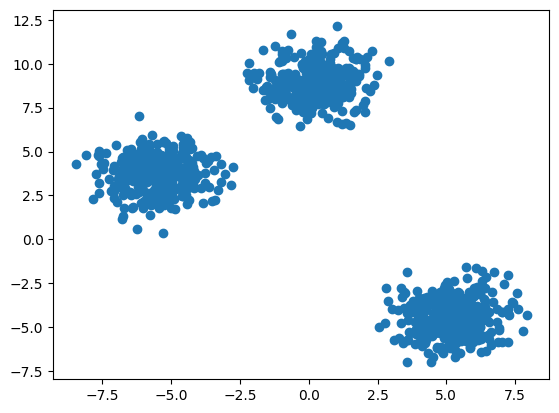

In [13]:
plt.scatter(X[:,0], X[:,1])

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
#here we set the testing size as 33% of the data

In [15]:
from sklearn.cluster import KMeans

In [16]:
## Manual Process for finding the number of cluster
# Elbow method to select the k value
wcss = []
for k in range(1, 11):
    # at first comparision is done with k value and then with k means ++
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

In [17]:
wcss 
# after this we will get the value for each k   and the value is in decreasing order

[34827.57682552022,
 7935.4372861454185,
 1319.2730531585607,
 1140.467788465513,
 1004.3854842272109,
 854.0646642160182,
 756.59021070541,
 663.5457314510586,
 579.1718729277138,
 534.1162403572669]

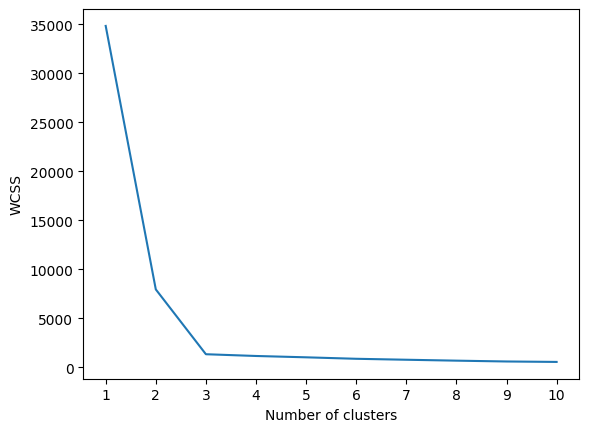

In [18]:
# creating and plotting the elbow curve
plt.plot(range(1,11), wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

## From this plot what we can define or identify is the value of k 

In [19]:
#for cluster
kmeans = KMeans(n_clusters= 3 , init="k-means++")

In [20]:
# applying for training and testing data 



# fitting the data 
y_labels = kmeans.fit_predict(X_train)

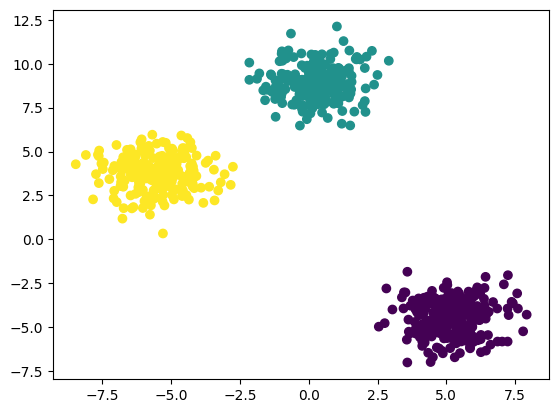

In [22]:
# scatter plot for train data 
plt.scatter(X_train[:,0], X_train[:,1], c=y_labels)


In [ ]:
# for testing data 